### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [1]:
'''allows plotting in the notebook'''
%matplotlib inline

'''Pandas creates data structures such as Series and DataFrames'''
import pandas as pd

'''SKLearn is a Machine Learning module. linear_model allows calling for a linear regression'''
import sklearn.linear_model as lm

'''Imports dummies, which allows for comparing estimators agains rules of thumb. 
   Metrics show performance of the model.'''
from sklearn import dummy, metrics

'''MatPlotLib allows creation of plots using the data'''
import matplotlib.pyplot as plt 

'''Seaborn is a module built on top of MatPlotLib which allows for more appealing graphs.'''
import seaborn as sns # cool graphics on top of matplotlib

'''Creates DataFrame *df* and imports data from location below into it.'''
df = pd.read_csv('../../assets/dataset/flight_delays.csv') 

In [2]:
print (df.shape) #prints (# of rows, # of columns)
print (df.isnull().sum()) # prints the amount of null values in each column

(469968, 16)
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
UNIQUE_CARRIER                0
AIRLINE_ID                    0
CARRIER                       0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
CRS_DEP_TIME                  0
DEP_TIME                  11657
DEP_DEL15                 11657
Unnamed: 15              469968
dtype: int64


In [3]:
'''Creates a copy of the DataFrame, without the null values'''
df = df.loc[df.DEP_DEL15.notnull()].copy()

'''Rewrites the dataframe after eliminating all rows which contain null values in the DEP_DEL15 column'''
df = df[df.DEP_DEL15.notnull()]

In [4]:
print (df.shape)
print (df.isnull().sum())

(458311, 16)
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
UNIQUE_CARRIER                0
AIRLINE_ID                    0
CARRIER                       0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DEL15                     0
Unnamed: 15              458311
dtype: int64


In [5]:
df.head(3).T #prints the first three rows, then transposes the table

,0,1,2
DAY_OF_MONTH,1,1,1
DAY_OF_WEEK,4,4,4
FL_DATE,2015-01-01,2015-01-01,2015-01-01
UNIQUE_CARRIER,AA,AA,AA
AIRLINE_ID,19805,19805,19805
CARRIER,AA,AA,AA
ORIGIN_AIRPORT_ID,12478,12892,12478
ORIGIN_AIRPORT_SEQ_ID,1247802,1289203,1247802
ORIGIN_CITY_MARKET_ID,31703,32575,31703
DEST_AIRPORT_ID,12892,12478,12892


In [6]:
df.head(3)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN


In [7]:
'''Creates dummies called CARRIER and DAY_OF_WEEK and 
   receive names for new columns with prefix carrier and dow from values in columns CARRIER and DAY_OF_WEEK'''
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier')) # ex. AA
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow')) # ex. dow_1

In [8]:
'''Creates a Logistic Regression model'''
model = lm.LogisticRegression()

In [9]:
print (df.shape)
print (df.isnull().sum())

(458311, 37)
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
UNIQUE_CARRIER                0
AIRLINE_ID                    0
CARRIER                       0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DEL15                     0
Unnamed: 15              458311
carrier_AA                    0
carrier_AS                    0
carrier_B6                    0
carrier_DL                    0
carrier_EV                    0
carrier_F9                    0
carrier_HA                    0
carrier_MQ                    0
carrier_NK                    0
carrier_OO                    0
carrier_UA                    0
carrier_US                    0
carrier_VX                    0
carrier_WN                    0
dow_1                      

In [10]:
'''Creates a List using a list comprehension taking in the names of the columns which contain dow_'''
features = [i for i in df.columns if 'dow_' in i]

In [11]:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']

In [12]:
df.shape

(458311, 37)

In [13]:
'''Adds the value CRS_DEP_TIME to the list'''
features += ['CRS_DEP_TIME']

In [14]:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7', 'CRS_DEP_TIME']

In [15]:
'''Creates a linear regression fit for the model''' # ????
model.fit(df[features[1:]], df['DEP_DEL15'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
'''Creates column *probability* and 
   sets each row value for its probability in having a late flight according to the model'''
df['probability'] = model.predict_proba(df[features[1:]]).T[1]

In [18]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,carrier_VX,carrier_WN,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,1,0,0,0,0.129193
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,1,0,0,0,0.129193
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,1,0,0,0,0.158102
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,1,0,0,0,0.157153
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0,0,0,0,0,1,0,0,0,0.165363


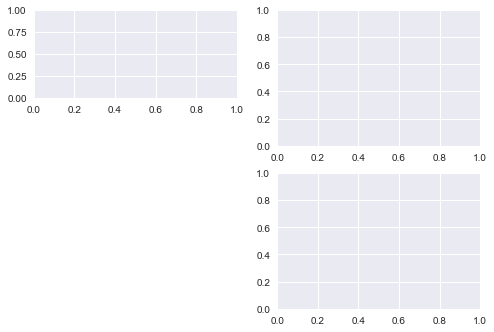

In [40]:
'''Creates a multi-graph plot (321) with 3 rows 2 columns and in the plot location number 1'''
ax = plt.subplot(321) #rows in thirds, columns in halves, first location
ax = plt.subplot(222) #rows in halves, columns in halves, second location
ax = plt.subplot(224) #rows in thirds, columns in halves, fourth location

In [41]:
'''Creates a list containing colors'''
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

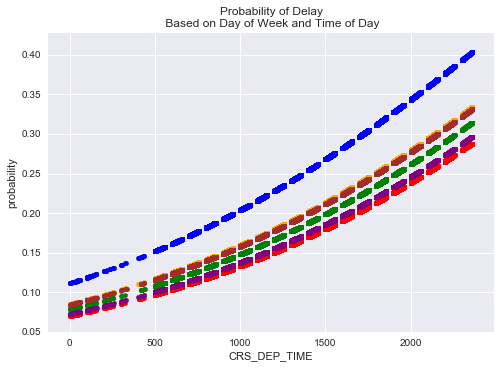

In [49]:
'''Creates a single plot'''
ax = plt.subplot(111)

'''Sets the title of the graph'''
ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

'''Creates a scatterplot 
   of the values of the probabilities 
   of each day of the week in the features list
   with respect to CRS_DEP_TIME 
   in a plot which is colored by the list colors'''
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(
        x='CRS_DEP_TIME', 
        y='probability', 
        kind='scatter', 
        color = c, 
        ax=ax)

### Other Answers: visualizing Airline or the inverse

In [55]:
'''Creates features list using carrier_ as prefix'''
features = [i for i in df.columns if 'carrier_' in i]

In [56]:
'''Adds the value to the end'''
features += ['CRS_DEP_TIME']

In [57]:
features

['carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_HA',
 'carrier_MQ',
 'carrier_NK',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'CRS_DEP_TIME']

In [58]:
X = df[features[1:]]

In [59]:
Y = df['DEP_DEL15']

In [60]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
features

['carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_HA',
 'carrier_MQ',
 'carrier_NK',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'CRS_DEP_TIME']

In [62]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown','white','black','cyan','maroon','indigo','gold','violet','lavender']

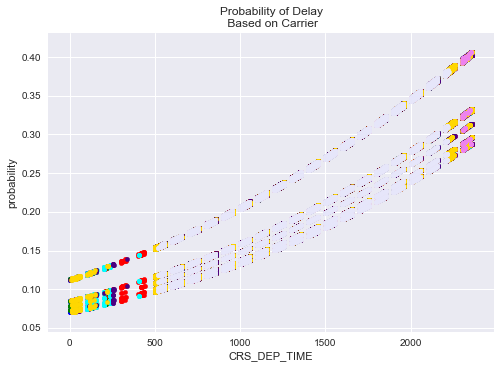

In [63]:
ax = plt.subplot(111)

ax.set(title='Probability of Delay\n Based on Carrier')

for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [ ]:
from sklearn import dummy, metrics

In [ ]:
model0 = dummy.DummyClassifier()

In [ ]:
model0.fit(df[features[1:]], df['DEP_DEL15'])

In [ ]:
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

In [ ]:
model1 = lm.LogisticRegression()

In [ ]:
model.fit(df[features[1:]], df['DEP_DEL15'])

In [ ]:
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]

In [ ]:
df.shape

In [ ]:
ax = plt.subplot(111)

In [ ]:
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)

In [ ]:
ax.plot(vals[0], vals[1])

In [ ]:
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)

In [ ]:
ax.plot(vals[0], vals[1])

In [ ]:
ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

#### Visualizing Precision / Recall

In [ ]:
metrics.precision_recall_curve

In [ ]:
ax = plt.subplot(111)
vals = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.precision_recall_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [ ]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:-1]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model = lm.LogisticRegression()
model.fit(df[features[1:-1]], df.DEP_DEL15)
df['probability_0'] = model.predict_proba(df[features[1:]]).T[1]



In [ ]:
import sklearn.metrics as metrics
precision, recall, thresholds = metrics.precision_recall_curve()